In [1]:
# Load the bank_Notes_dataset
import pandas as pd
import numpy as np
df=pd.read_csv('bill_authentication.csv')

In [14]:
# Prepare data into features=>X and target=>y
df.head()
X=df.iloc[:,:3]

In [15]:
y=df.iloc[:,4]

In [17]:
#Split data into Training and Testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
#Make model of GaussianNB and fit it to training data
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X,y)
predicted=model.predict(X_test)
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0]


In [20]:
# Print the accuracy and classification_report.
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,predicted))
print(accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       148
           1       0.84      0.72      0.77       127

    accuracy                           0.81       275
   macro avg       0.81      0.80      0.80       275
weighted avg       0.81      0.81      0.81       275

0.8072727272727273
[[131  17]
 [ 36  91]]


In [22]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import pandas.testing as tm
import seaborn as sns


In [27]:
training=pd.read_csv('har_train.txt')
training

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.00,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13732,E,154.00,-32.70,125.0,24,0.29,0.05,-0.36,67,51,...,32,1.36,-2.83,-0.61,-227,221,0,-592,-85,431
13733,E,154.00,-32.90,126.0,24,0.31,0.05,-0.41,69,52,...,31,1.33,-2.89,-0.71,-230,200,-8,-571,-126,404
13734,E,145.00,-35.50,130.0,19,0.37,0.00,-0.64,47,13,...,29,1.54,-1.20,0.05,-263,-99,-45,-116,-654,-70
13735,E,143.00,-35.90,131.0,18,0.37,-0.02,-0.59,46,18,...,32,1.48,-0.90,0.05,-270,-141,-51,-68,-678,-98


In [26]:
test=pd.read_csv('har_validate.txt')
test

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,...,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0
1,A,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,...,36,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0
2,A,1.42,8.21,-94.4,3,0.02,0.00,-0.02,-22,4,...,36,0.00,-0.02,-0.03,193,202,-214,-14,659.0,478.0
3,A,1.48,8.15,-94.4,3,0.00,0.00,0.00,-21,4,...,36,0.02,0.00,0.00,194,204,-215,-13,656.0,471.0
4,A,1.51,8.12,-94.4,3,0.00,0.00,-0.02,-21,4,...,36,0.02,-0.02,0.00,192,204,-213,-13,653.0,481.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,E,156.00,-32.10,124.0,25,0.22,0.05,-0.28,74,52,...,36,1.38,-2.94,-0.48,-193,291,3,-683,152.0,555.0
5881,E,151.00,-33.80,127.0,23,0.35,0.02,-0.54,60,47,...,25,1.51,-2.18,-1.02,-241,33,-17,-377,-420.0,173.0
5882,E,148.00,-34.70,129.0,21,0.37,0.00,-0.62,49,25,...,27,1.75,-1.91,-0.38,-255,-50,-30,-226,-570.0,27.0
5883,E,147.00,-34.80,129.0,21,0.37,-0.02,-0.67,50,26,...,29,1.73,-1.75,-0.25,-271,-68,-37,-205,-587.0,6.0


In [29]:
xtrain=training.drop('classe',axis=1)
ytrain=training.loc[:,'classe']

In [31]:
xtest=test.drop('classe',axis=1)
ytest=test.loc[:,'classe']

In [32]:
model=GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB()

In [33]:
predict=model.predict(xtest)

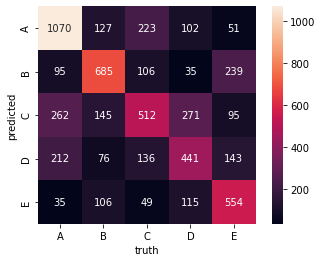

In [44]:
import matplotlib.pyplot as plt
mat=confusion_matrix(predict,ytest)
names=np.unique(predict)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=True,xticklabels=names,yticklabels=names)
plt.xlabel('truth')
plt.ylabel('predicted');

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(predict,ytest))
print(confusion_matrix(predict,ytest))
print(accuracy_score(predict,ytest))

              precision    recall  f1-score   support

           A       0.64      0.68      0.66      1573
           B       0.60      0.59      0.60      1160
           C       0.50      0.40      0.44      1285
           D       0.46      0.44      0.45      1008
           E       0.51      0.64      0.57       859

    accuracy                           0.55      5885
   macro avg       0.54      0.55      0.54      5885
weighted avg       0.55      0.55      0.55      5885

[[1070  127  223  102   51]
 [  95  685  106   35  239]
 [ 262  145  512  271   95]
 [ 212   76  136  441  143]
 [  35  106   49  115  554]]
0.5542905692438402
